<a href="https://colab.research.google.com/github/Humaidabdullah/Deep-Learning-PadhAI/blob/master/Sigmoid%20Neuron/SigmoidNeuronClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Sigmoid Neuron Class

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(x,self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1-y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1-y_pred) 
  
  def fit(self, X, Y, epochs=1, lr = 1, initialize = True):
    if initialize:
      self.w = np.random.rand(1,X.shape[1]) #(row,col)
      self.b = 0
    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr * dw
      self.b -= lr * db
        
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Fit for toy data

In [ ]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]

In [ ]:
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.25)

The plot here tells how well the function is performing on each iteration. Once W and B are updated in the class, the value of Y is calculated for the meshgrid of XX1 and XX2. We are passing the *sn* into the plot function. So each plot is basically the sigmoid plot we are getting after the updation of W and B in the fit function.

Also, we are plotting the X values on XX1 and XX2 axes along with Y values using colors.

In [ ]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size): #X2 first then X1
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap='viridis')
  ax.scatter(X[:,0],X[:,1],c=Y,cmap = 'viridis')
  plt.plot()

The reason we are using **ax** is because if we only use one object **plt** it overrides itself and shows only one plot. so we use an handler.

[[0.83080505 0.10922657]] [0.03967405]
[[ 0.86441298 -0.84721165]] [-0.00382227]
[[ 1.39840257 -0.09590767]] [0.00436301]
[[ 1.2867586  -0.86656077]] [-0.12871481]
[[ 1.72611729 -0.13824915]] [-0.22015626]
[[ 1.59480935 -0.91268699]] [-0.3574437]
[[ 1.94035336 -0.30984239]] [-0.45591715]
[[ 1.82832199 -0.91940652]] [-0.57431086]
[[ 2.0470996  -0.53612918]] [-0.63977658]
[[ 2.02370171 -0.70370059]] [-0.67926508]
[[ 2.05418618 -0.68293128]] [-0.69855273]
[[ 2.07400991 -0.68775753]] [-0.71716798]
[[ 2.09255768 -0.69350061]] [-0.73479105]
[[ 2.1102932 -0.6990895]] [-0.75147956]
[[ 2.12730985 -0.70446367]] [-0.7673177]
[[ 2.14366759 -0.70963226]] [-0.78238136]
[[ 2.15941708 -0.71460991]] [-0.79673728]
[[ 2.17460301 -0.7194105 ]] [-0.81044425]
[[ 2.18926521 -0.72404657]] [-0.8235543]
[[ 2.20343938 -0.72852938]] [-0.83611363]


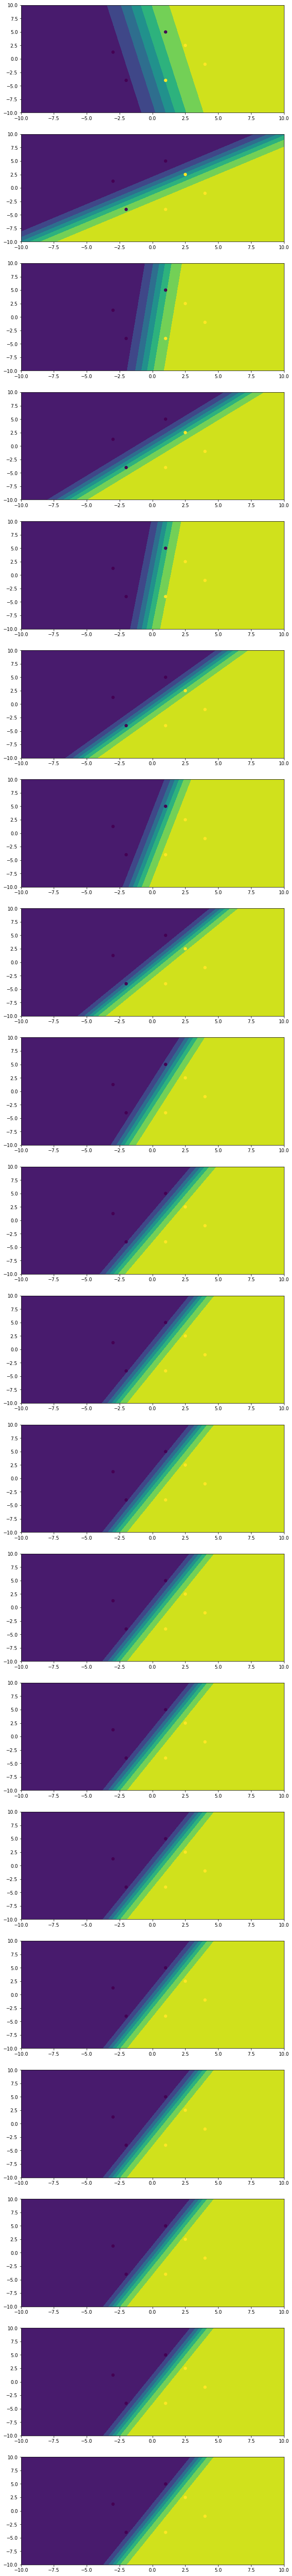

In [12]:
sn.fit(X,Y,1,.75,True)
N = 20
plt.figure(figsize = (10,N*5))
for i in range(N):
  print(sn.w,sn.b)
  ax = plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,1,False)

Try this with different number of epochs and learning rates to get a better intuition

# Animate

[-0.36895803 -0.36895803]
